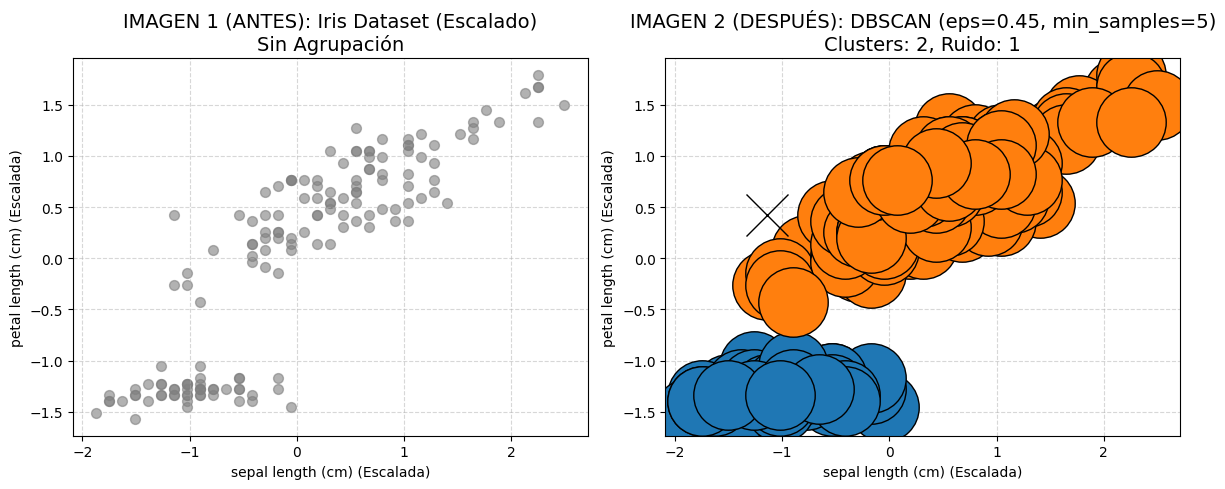

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------------------
# Carga y Preparación del Dataset Iris
# ----------------------------------------------------------------------

# Cargar el dataset Iris
iris = load_iris()
# Creamos un DataFrame para mejor manejo de los datos
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Variables a usar para el experimento y la visualización 2D:
# Longitud del Sépalo y Longitud del Pétalo
features = ['sepal length (cm)', 'petal length (cm)']
X = df_iris[features].values

# DBSCAN es sensible a la escala de las características. Estandarizamos los datos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------------------------
# Visualización "ANTES" (IMAGEN 1: Datos Originales Sin Agrupar)
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Todos los puntos en un solo color (gris) para representar el estado inicial
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50, alpha=0.6)
plt.title('IMAGEN 1 (ANTES): Iris Dataset (Escalado)\nSin Agrupación', fontsize=14)
plt.xlabel(f'{features[0]} (Escalada)')
plt.ylabel(f'{features[1]} (Escalada)')
plt.grid(True, linestyle='--', alpha=0.5)

# ----------------------------------------------------------------------
# Aplicación y Ejecución de DBSCAN
# ----------------------------------------------------------------------

# Parámetros ajustables para DBSCAN en Iris Dataset:
# Estos valores son un buen punto de partida para este dataset
eps_val = 0.45
min_samples_val = 5

db = DBSCAN(eps=eps_val, min_samples=min_samples_val)
clusters = db.fit_predict(X_scaled)

# ----------------------------------------------------------------------
# Visualización "DESPUÉS" (IMAGEN 2: Datos Agrupados por DBSCAN)
# ----------------------------------------------------------------------

plt.subplot(1, 2, 2)
unique_labels = set(clusters)
colors = [plt.cm.tab10(each) for each in range(len(unique_labels))]

#  Dibujar los clústeres (Bucle corregido para evitar ValueError)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Puntos de Ruido (etiqueta -1): Usamos color negro ('k') y marcador 'x'
        face_color = 'k'
        edge_color = 'k'
        marker = 'x'
        size = 30
    else:
        # Clústeres (0, 1, 2...): Usamos la tupla de color RGBA
        face_color = tuple(col)
        edge_color = 'k'
        marker = 'o'
        size = 50

    class_member_mask = (clusters == k)
    xy = X_scaled[class_member_mask]

    # Se usa face_color y edge_color que ahora manejan la cadena 'k' correctamente
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=face_color,
             markeredgecolor=edge_color, markersize=size, linestyle='')

#  Análisis de resultados para el título
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

plt.title(f'IMAGEN 2 (DESPUÉS): DBSCAN (eps={eps_val}, min_samples={min_samples_val})\nClusters: {n_clusters}, Ruido: {n_noise}', fontsize=14)
plt.xlabel(f'{features[0]} (Escalada)')
plt.ylabel(f'{features[1]} (Escalada)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()